# INTELIGENCIA ARTIFICIAL (1INF24)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)

# Preprocesamiento de datos
<b>Contenido</b>:
- [Revisión de la librería Pandas](#pandas)
- [Viendo tipos de datos](#tiposdatos)
- [Estadísticas descriptivas](#estadisticasdescriptivas)
- [Análisis exploratorio visual](#analisis_visual)
- [Tratando valores faltantes](#valoresfaltantes)
- [Operaciones de Preprocesamiento](#operaciones)

In [1]:
# Importa algunas librerias base
import pandas as pd
import numpy as np


<a name='pandas'></a>
## <font color=blue>Revisión de la librería Pandas</font>

### DataFrames
Un DataFrame es una estructura bidimensional (tipo tabla), donde a cada fila se le puede asociar una etiqueta (índice).

Se puede crear un DataFrame desde un diccionario de Series:

In [2]:
import pandas as pd

# Crea un DataFrame a partir de un diccionario
d = {'X': [1, 2, 3, 4],
     'Y': [5, 6, 7, 8]}
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


Para ver las dimensiones del DataFrame:

In [3]:
df.shape

(4, 2)

Para obtener la transpuesta:

In [4]:
df1 = df.T  # Transpuesta
df1

,a,b,c,d
X,1,2,3,4
Y,5,6,7,8


In [5]:
df1.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

Para obtener los nombres de las filas:

In [8]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
df1.index

Index(['X', 'Y'], dtype='object')

Para obtener los nombres de las columnas:

In [10]:
df.columns

Index(['X', 'Y'], dtype='object')

In [11]:
df1.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

Para recuperar la matriz de valores (array numpy) del DF:

In [12]:
a = df.values
a

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [13]:
type(a)

numpy.ndarray

Para recuperar valores en una posición especificada por índice numérico.

In [14]:
df

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


Para recuperar el valor de la fila 2, columna 1:

In [16]:
df.iloc[2, 1]

np.int64(7)

Para recuperar la última fila:

In [17]:
a[-1, :]

array([4, 8])

Se puede crear nuevas columnas a partir de operaciones entre columnas.

In [18]:
df

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


In [19]:
df['Z1'] = df['X'] + df['Y']
df

,X,Y,Z1
a,1,5,6
b,2,6,8
c,3,7,10
d,4,8,12


In [20]:
df.shape

(4, 3)

In [21]:
df['outlier'] =  (df['X'] >= 3) & (df['Y'] >= 7)
df

,X,Y,Z1,outlier
a,1,5,6,False
b,2,6,8,False
c,3,7,10,True
d,4,8,12,True


Para eliminar una columna:

In [22]:
del( df['Z1'] )
df

,X,Y,outlier
a,1,5,False
b,2,6,False
c,3,7,True
d,4,8,True


Insertar una columna como columna 0:

In [23]:
df.insert(0, 'X-Y', df['X'] - df['Y'])
df

,X-Y,X,Y,outlier
a,-4,1,5,False
b,-4,2,6,False
c,-4,3,7,True
d,-4,4,8,True


Borrar una fila:

In [24]:
df = df.drop(index = 'b')
df

,X-Y,X,Y,outlier
a,-4,1,5,False
c,-4,3,7,True
d,-4,4,8,True


Borrar filas de indices 'c' y 'd'. Inplace = True es para indicar que el borrado se haga en el mismo dataframe:

In [25]:
df.drop(index = ['c', 'd'], inplace = True)
df

,X-Y,X,Y,outlier
a,-4,1,5,False


Cambiar algún valor:

In [26]:
df.iloc[0, 0] = 10
df

,X-Y,X,Y,outlier
a,10,1,5,False


Operaciones entre Dataframes

In [27]:
# Crea un dataframe a partir de un diccionario
d = {'X': [1, 2, 3, 4],
     'Y': [5, 6, 7, 8]}
df1 = pd.DataFrame(d, index = ['a', 'b', 'c', 'd'] )
df1

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


In [28]:
df

,X-Y,X,Y,outlier
a,10,1,5,False


In [29]:
# suma dataframes
df1 + df

,X,X-Y,Y,outlier
a,2.0,NaN,10.0,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN


In [30]:
df1.dtypes

,0
X,int64
Y,int64


### Cargando datos con Pandas
Pandas ofrece varias funciones para cargar datos de una diveridad de formatos. Por ejemplo, la función <b>read_csv()</b> sirve para leer data tabular de un archivo de texto separado por comas (también puede ser otro separador). La función retorna un objeto DataFrame. Aquí un ejemplo para leer el archivo pima-indians-diabetes.data.csv (ver descripcion en https://www.kaggle.com/uciml/pima-indians-diabetes-database):

In [31]:
# Carga archivo CSV usando Pandas
filename = 'pima-indians-diabetes.data.csv'
feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = feature_names)
data.head(5)  # Muestra los primeros registros (por defecto 5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
print(data.shape)

(768, 9)


También, se puede cargar archivos directamente de internet. Por ejemplo:

In [33]:
# Cargar dataset de internet
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_iris = pd.read_csv(url, names=names)
data_iris.head()  # Muestra los primeros 5 registros

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
print(data_iris.shape)

(150, 5)


<a name='tiposdatos'></a>
## <font color=blue>Viendo los tipos de datos de los atributos</font>

Para propósitos de Data Science nos referiremos a las columnas de los Dataframes como <b>atributos</b>. Una de las primeras cosas que se hace cuando se cargan datos de un archivo es inspeccionar el tipo de dato de cada atributo.

In [35]:
# Carga datos de un archivo csv
filename = "pima-indians-diabetes.data.csv"
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']  # Nombres de columnas
data = pd.read_csv(filename, names = col_names)  # Carga datos del csv y le asigna nombres de columnas(ya que el csv no tiene cabecera)
data.head()  # Muestra los 5 primeros registros

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.tail(5)  # Muestra los 5 últimos registros

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [39]:
# Muestra los tipos de datos de cada atributo
data.dtypes

,0
preg,int64
plas,int64
pres,int64
skin,int64
test,int64
mass,float64
pedi,float64
age,int64
class,int64


In [40]:
# Podemos obtener informacion mas detallada con el metodo .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a name='estadisticasdescriptivas'></a>
## <font color=blue>Estadísticas descriptivas</font>

### Operaciones de reducción de columnas o filas
Muchas  veces queremos sumarizar las filas o columnas con alguna operación de reducción:
 - conteo: ***.count()***
 - suma: ***.sum()***
 - máximo: ***.max()***
 - mínimo: ***.min()***
 - promedio: ***.mean()***
 - desviación estándar: ***.std()***

Por defecto las funciones de reducción se hacen a nivel de columnas (axis = 0). Para hacer la reducción a nivel de filas debemos pasar el argumento <b>axis = 1</b> a la operación requerida.

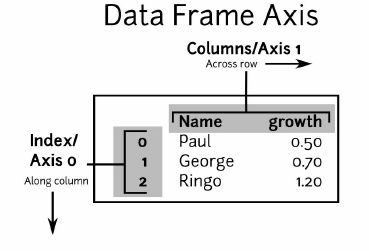

In [41]:
data.head(2)  # Muestra los 2 primeros registros

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [42]:
# Cuenta el numero de elementos no nulos en cada columna
data.count(axis = 0)

,0
preg,768
plas,768
pres,768
skin,768
test,768
mass,768
pedi,768
age,768
class,768


In [43]:
# Valor maximo de cada columna
data.max(axis = 0)

,0
preg,17.00
plas,199.00
pres,122.00
skin,99.00
test,846.00
mass,67.10
pedi,2.42
age,81.00
class,1.00


In [44]:
# Suma los elementos de cada fila
data.sum(axis = 1)

,0
0,346.227
1,238.951
2,311.972
3,322.267
4,459.388
...,...
763,511.071
764,285.140
765,389.445
766,265.449


In [45]:
data.median()  # Mediana de las columnas (por defecto la reduccion es para axis = 0)

,0
preg,3.0000
plas,117.0000
pres,72.0000
skin,23.0000
test,30.5000
mass,32.0000
pedi,0.3725
age,29.0000
class,0.0000


Una forma rápida de obtener estadísticas sumarias de los atributos es usando el metodo <b>describe()</b> del objeto DataFrame.

In [46]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos cambiar el formato general de como pandas muestra los DataFrames usando el metodo <b>set_option()</b>.

In [47]:
pd.set_option('display.width', 100)    # Setea el ancho que se mostrara en lo sucesivo los DataFrames
pd.set_option('display.precision', 1)  # Setea la cantidad de decimales a mostrar en lo sucesivo en los DataFrames
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.0,768.0,768.0,768.0,768.0,768.0,7.7e+02,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,4.7e-01,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,3.3e-01,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,7.8e-02,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,2.4e-01,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,3.7e-01,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,6.3e-01,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4e+00,81.0,1.0


#### Grado de balance de la variable class
Una información importante a conocer cuando se proyecta clasificadores es saber qué tan balanceada está la variable objetivo (en este caso <b>class</b>). El método <b>value_counts()</b> de un Dataframe permite ver ello.

In [48]:
# Obtiene conteo de instancias por clase (class 0 = no diabetes, clase 1 = diabetes)
data['class'].value_counts()

,count
class,
0,500
1,268


In [49]:
data_iris['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<a name='analisis_visual'></a>
## <font color=blue>Análisis exploratorio visual de los datos</font>

#### Histogramas
Una forma básica de entender una variable es a través de su histograma. Un histograma agrupa los datos en bins y cuenta el número de observaciones en cada bin. De este gráfico se puede inferir que tipo de distribución sigue la variable. Algunos algoritmos de ML necesitan atributos gausianianos para funcionar adecuadamente. La función <b>hist()</b> de un DataFrame muestra el histograma de cada atributo (columna):

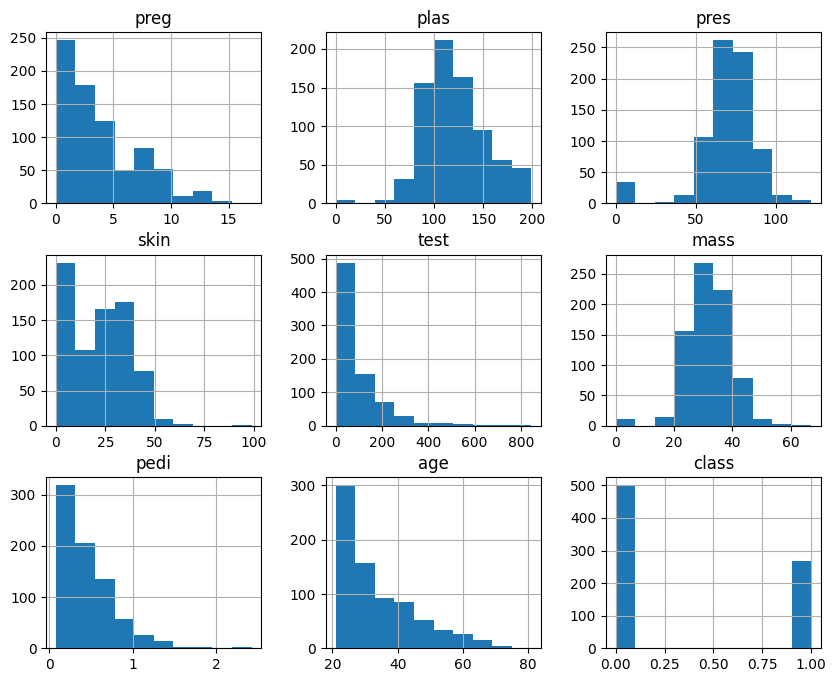

In [50]:
# Muestra histogramas de los atributos
import matplotlib.pyplot as plt

data.hist(bins = 10, figsize = [10, 8])  # Plotea histograma de cada columna del dataframe con 10 bins
plt.show()

#### Plots de densidad
Son curvas suavizadas ajustadas sobre los histogramas. Se pueden plotear con el método <b>plot()</b> de un DataFrame especificando el argumento kind = 'density'.

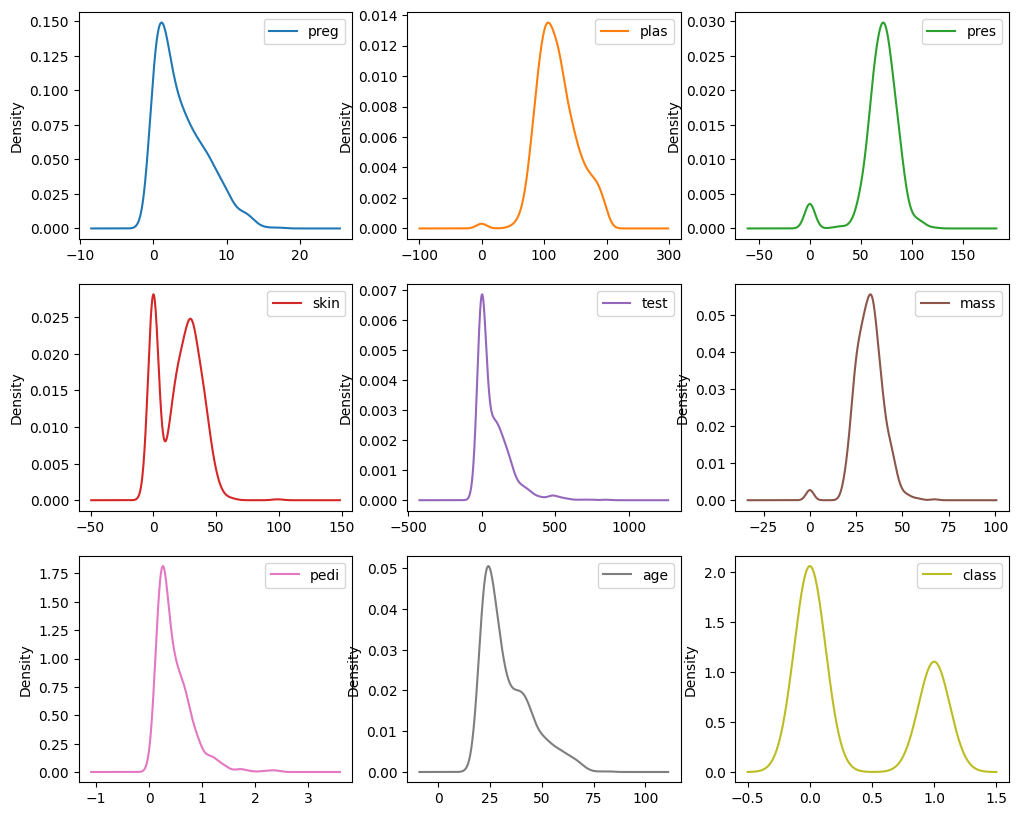

In [51]:
data.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False, figsize = [12, 10])
plt.savefig('histograma.pdf')  # Salva la figura en un archivo pdf
plt.show()

#### BoxPlots
Sumarizan la distribución de cada atributo. Dibuja una caja entre el 25avo y 75avo percentil. La línea interna es la mediana. Las cotas (whiskers o bigotes) dan una idea de la dispersión de los datos. Puntos fuera del intervalo de los bigotes son candidatos a outliers. Se pueden plotear con el método <b>plot()</b> de un DataFrame especificando el argumento kind = 'box'.

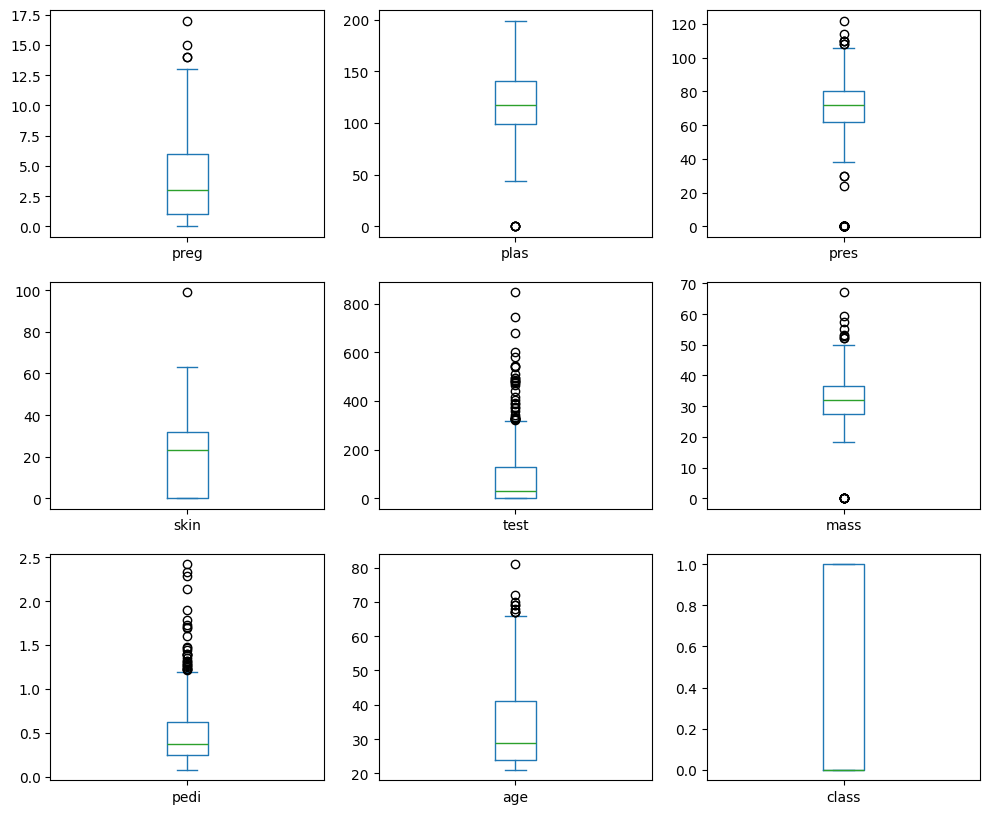

In [52]:
data.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = [12, 10])
plt.show()

#### Plot de Matriz de Correlación
Se puede visualizar las correlaciones entre los diferentes pares de variables para entender la estructura de correlaciones. Algunos modelos pueden tener pobre desempeño cuando las variables de entrada estan fuertemente correlacionadas.

In [53]:
import numpy

# Carga la data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)

# Computa matriz de correlaciones
correlations = data.corr()
correlations

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.0e+00,1.3e-01,1.4e-01,-8.2e-02,-7.4e-02,1.8e-02,-3.4e-02,5.4e-01,2.2e-01
plas,1.3e-01,1.0e+00,1.5e-01,5.7e-02,3.3e-01,2.2e-01,1.4e-01,2.6e-01,4.7e-01
pres,1.4e-01,1.5e-01,1.0e+00,2.1e-01,8.9e-02,2.8e-01,4.1e-02,2.4e-01,6.5e-02
skin,-8.2e-02,5.7e-02,2.1e-01,1.0e+00,4.4e-01,3.9e-01,1.8e-01,-1.1e-01,7.5e-02
test,-7.4e-02,3.3e-01,8.9e-02,4.4e-01,1.0e+00,2.0e-01,1.9e-01,-4.2e-02,1.3e-01
mass,1.8e-02,2.2e-01,2.8e-01,3.9e-01,2.0e-01,1.0e+00,1.4e-01,3.6e-02,2.9e-01
pedi,-3.4e-02,1.4e-01,4.1e-02,1.8e-01,1.9e-01,1.4e-01,1.0e+00,3.4e-02,1.7e-01
age,5.4e-01,2.6e-01,2.4e-01,-1.1e-01,-4.2e-02,3.6e-02,3.4e-02,1.0e+00,2.4e-01
class,2.2e-01,4.7e-01,6.5e-02,7.5e-02,1.3e-01,2.9e-01,1.7e-01,2.4e-01,1.0e+00


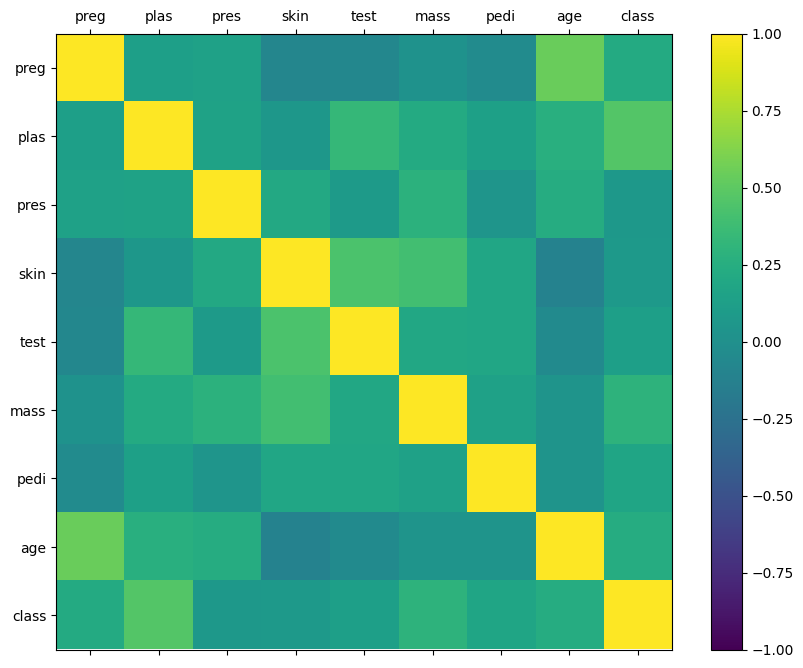

In [54]:
# Plotea la matriz de correlacion
fig = plt.figure( figsize=[10,8])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

<a name='valoresfaltantes'></a>
## <font color=blue>Tratando valores faltantes</font>

Cuando existe valores faltantes, estos aparecen como valores <b>NaN</b> al importar los datos a un Dataframe.

In [55]:
data.shape

(768, 9)

In [56]:
# Cargar datos de un archivo excel (Iris_missing.xlsx)
filename = "Iris_missing.xlsx"
data = pd.read_excel(filename, header = 0)  # Lee los datos indicándole que la cabecera es la linea 0
data.head(10)  # Muestra los 10 primeros registros

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,NaN,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [57]:
data.dtypes

,0
sepal-length,float64
sepal-width,float64
petal-length,float64
petal-width,float64
class,object


In [58]:
data.shape

(150, 5)

In [59]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,146.0,146.0,147.0,147.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [60]:
# Obtiene el conteo de instancias por clase
data['class'].value_counts()

,count
class,
Iris-versicolor,50
Iris-setosa,49
Iris-virginica,49


### Viendo si hay valores faltantes
La función <b>isnull()</b> de un DataFrame marca cada celda NaN con True. Haciendo sum() podemos obtener el conteo de datos faltantes por columna.

In [61]:
# Chequea cuantos valores faltantes hay en cada columna
data.isnull().sum()

,0
sepal-length,4
sepal-width,4
petal-length,3
petal-width,3
class,2


In [62]:
# Chequea si algun valor del Dataframe es faltante (valor NaN)
data.isnull().values.any()

np.True_

### Eliminando filas o columnas con valores faltantes

La función <b>dropna()</b> devuelve un DataFrame sin las filas (o columnas si se especifica argumento axis = 1) que contengan algún valor faltante en el DataFrame. Recuerde que toda operación sobre dataframe genera un nuevo dataframe, a menos que se coloque el argumento <b>inplace = True</b>.

In [63]:
data.dropna(axis = 0).head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [64]:
data1 = data.dropna(axis = 0)  # Elimina las filas que tienen valores faltantes en data
data1.head(10)  # Muestra los 10 primeros registros del dataframe sin valores faltantes

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [65]:
# Muestra la cantidad de valores faltantes en cada columna de data1
data1.isnull().sum()

,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
class,0


In [66]:
data1.shape

(137, 5)

In [67]:
# Para eliminar las columnas con valores faltantes se tiene que especificar axis = 1 como argumento de dropna
data1 = data.dropna(axis = 1)
data1.head()

""
0
1
2
3
4


In [68]:
# Para eliminar solo las filas donde todos sus valores son NaN podemos especificar el argumento how = 'all'
data1 = data.dropna(how = 'all')
data1.shape

(150, 5)

In [69]:
# Para eliminar las filas con menos de 4 elementos no faltantes (osea 2 o mas elementos faltantes)
data1 = data.dropna(thresh = 4)
data1.shape

(147, 5)

In [70]:
# Para eliminar las filas cuyo valor faltante aparece en columnas especificadas
data1 = data.dropna(subset = ['class'])  # Elimina filas cuyo valor faltante esta en la columna class
data1.shape

(148, 5)

### Imputando valores faltantes

La función <b>fillna()</b> devuelve un DataFrame con valores faltantes imputados a nivel de columnas. Se le puede pasar como valores a imputar las medias de las columnas (o cualquier otra operación de reducción a nivel de columna).

In [71]:
data.mean(numeric_only = True)

,0
sepal-length,5.8
sepal-width,3.1
petal-length,3.8
petal-width,1.2


In [72]:
# Imputa los valores faltantes de cada columna numerica con la media de la columna
data1 = data.fillna(data.mean(numeric_only = True))
data1.isnull().sum()  # Muestra cuantos valores NaN hay por cada columna

,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
class,2


In [73]:
data1.mode().iloc[0]

,0
sepal-length,5.0
sepal-width,3.0
petal-length,1.5
petal-width,0.2
class,Iris-versicolor


In [74]:
# Imputa los valores faltantes de las columnas categoricas con la moda de las columnas
data1 = data1.fillna(data1.mode().iloc[0])
data1.isnull().sum()  # Muestra cuantos valores NaN hay por cada columna

,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
class,0


In [75]:
data1.isnull().values.any()

np.False_

<a name='operaciones'></a>
## <font color=blue>Operaciones de Reescalamiento, Estandarización, Normalización y Binarización de atributos</font>

Las operaciones de reescalamiento, estandarización, normalización y binarización de los atributos son frecuentemente requeridas en el proceso de análisis de datos. Para realizar dichas tareas nos valdremos de la librería <b>sklearn</b>, específicamente de su módulo preprocesing. <b>Es recomendable que estas tareas se hagan sobre data sin valores faltantes</b>, por lo que se recomienda imputar o eliminar los NaN. Los ejemplos mostrados en esta sección se harán sobre la data imputada de Iris_missing.xlsx

In [76]:
# Carga datos de un archivo excel (Iris_missing.xlsx)
filename = "Iris_missing.xlsx"
data = pd.read_excel(filename, header = 0)  # Lee los datos indicandole que la cabecera es la linea 0
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,146.0,146.0,147.0,147.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [77]:
# Imputa los valores faltantes de cada columna numerica con la media de la columna
data_imputed = data.fillna(data.mean(numeric_only = True))

# Imputa los valores faltantes de las columnas categoricas con la moda de las columnas
data_imputed = data_imputed.fillna(data.mode().iloc[0])

In [78]:
# Verifica si hay valores faltantes
data_imputed.isnull().values.any()

np.False_

In [79]:
data_imputed.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


### **Reescalamiento de atributos**
La operación de reescalamiento transforma los atributos de entrada a un mismo intervalo. La clase <b>MinMaxScaler</b> de la librería scikit-learn nos facilita implementar una operación de escalamiento.

In [80]:
# Importa la funcion MinMaxScaler de la libreria sklearn que hace la operacion de reescalamiento
from sklearn.preprocessing import MinMaxScaler

In [81]:
# Obtiene los atributos numericos que se quieren reescalar
X = data_imputed[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

# Define el operador de escalamiento (escalador) para escalar columnas entre [0,1]
scaler = MinMaxScaler(feature_range = (0, 1))

# Rescala los atributos entre 0 y 1.
# rescaledX = scaler.fit_transform(X)  # Realiza el escalado de X. El resultado es un array numpy
scaler_fit = scaler.fit(X)
rescaledX = scaler_fit.transform(X)

# Imprime las 5 primeras muestras de datos reescalados:
print(rescaledX[0:5, :])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [82]:
# Convierte el array reescalado a Dataframe y muestra sus estadisticas
data_rescaled = pd.DataFrame(rescaledX, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data_rescaled.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.0,150.0,150.0,1.5e+02
mean,0.4,0.4,0.5,4.5e-01
std,0.2,0.2,0.3,3.1e-01
min,0.0,0.0,0.0,0.0e+00
25%,0.2,0.3,0.1,8.3e-02
50%,0.4,0.4,0.6,5.0e-01
75%,0.6,0.5,0.7,7.1e-01
max,1.0,1.0,1.0,1.0e+00


### **Estandarización de atributos**
La operación de estandarización transforma los atributos de entrada para que tengan una media 0 y una varianza 1. La clase <b>StandardScaler</b> de la librería scikit-learn nos facilita la operación de estandarización.

In [83]:
# Importa la funcion StandardScaler de la libreria sklearn que hace la operacion de estandarizacion
from sklearn.preprocessing import StandardScaler

In [84]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

# Define el operador de estandarizacion (estandarizador) para estandarizar columnas
standardizer = StandardScaler()

# Estandariza los atributos de X.
standardizedX = standardizer.fit_transform(X)  # Realiza la estandarizacion de X. El resultado es un array numpy

# Imprime las 5 primeras muestras de datos estandarizados:
print(standardizedX[0:5, :])

[[-0.91336413  1.04755225 -1.35400549 -1.30657382]
 [-1.15985426 -0.12352454 -1.35400549 -1.30657382]
 [-1.4063444   0.34490618 -1.41123344 -1.30657382]
 [-1.52958947  0.11069082 -1.29677754 -1.30657382]
 [-1.0366092   1.28176761 -1.35400549 -1.30657382]]


In [85]:
# Convierte el array estandarizado a un Dataframe y muestra sus estadisticas
data_standardized = pd.DataFrame(standardizedX, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data_standardized.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,1.5e+02,1.5e+02,150.0,1.5e+02
mean,5.7e-16,-8.5e-16,0.0,-1.9e-16
std,1.0e+00,1.0e+00,1.0,1.0e+00
min,-1.9e+00,-2.5e+00,-1.6,-1.4e+00
25%,-9.1e-01,-5.9e-01,-1.2,-1.2e+00
50%,-5.1e-02,-1.2e-01,0.3,1.5e-01
75%,6.9e-01,5.8e-01,0.8,8.2e-01
max,2.5e+00,3.2e+00,1.8,1.7e+00


### **Normalización de filas**
La operación de normalización transforma los datos de tal forma que cada fila suma 1. Se usa cuando la información relevante está en la importancia relativa de los atributos de entrada en cada muestra y no en los valores absolutos. La clase <b>Normalizer</b> de la librería scikit-learn nos facilita la operación de normaalización.

In [86]:
# Importa la funcion Normalizer de la libreria sklearn que hace la operacion de normalizacion
from sklearn.preprocessing import Normalizer

In [87]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length','sepal-width','petal-length','petal-width']]

# Define el operador de normalizacion (normalizer) para normalizar las filas.
# El argumento norm indica el tipo de norma: norm = "l1" hace que la suma de la fila sea igual a 1
# norm = "l2" hace que norma euclidiana de cada fila sea igual a 1
normalizer = Normalizer(norm="l1")

# Estandariza los atributos de X.
normalizedX = normalizer.fit_transform(X)  # Realiza la estandarizacion de X. El resultado es un array numpy

# Imprime las 5 primeras muestras de los datos normalizados:
print(normalizedX[0:5, :])

[[0.5        0.34313725 0.1372549  0.01960784]
 [0.51578947 0.31578947 0.14736842 0.02105263]
 [0.5        0.34042553 0.13829787 0.0212766 ]
 [0.4893617  0.32978723 0.15957447 0.0212766 ]
 [0.49019608 0.35294118 0.1372549  0.01960784]]


In [88]:
# Convierte el array normalizado a un Dataframe y muestra la suma de las filas
data_normalized = pd.DataFrame(normalizedX, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data_normalized.sum(axis = 1)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [89]:
data_normalized.to_excel('data_normalizada.xlsx')

### **Binarización de atributos**
Es una operación donde se aplica un umbral y todos los valores mayores al umbral son colocados en 1, de lo contrario son colocados en 0. La clase <b>Binarizer</b> de scikit-learn facilita esta operacion.

In [90]:
# Importa la funcion Binarizer de la libreria sklearn que hace la operacion de binarizacion
from sklearn.preprocessing import Binarizer

In [91]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

# Define el operador de binarizacion (binarizer) para binarizar los datos.
binarizer = Binarizer(threshold=0.3)  # Define un binarizador con umbral igual a 0.3

# Binariza los atributos de X.
binarizerX = binarizer.fit_transform(X)  # Realiza la binarizacion de X. El resultado es un array numpy

# Imprime las 5 primeras muestras de datos binarizados:
print(binarizerX[0:5, :])

[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]


In [92]:
# Convierte el array binarizado a un Dataframe y muestra una parte del mismo
data_binarized = pd.DataFrame(binarizerX, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data_binarized.head(10)

,sepal-length,sepal-width,petal-length,petal-width
0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,0.0
